# EDA -- REVIEWS DE YELP

<p> La opinión de los usuarios es un dato muy valioso, que crece día a día gracias a plataformas de reseñas. Su análisis puede ser determinante para la planificación de estrategias. <strong> Yelp </strong> y <strong>Google</strong> son plataformas donde los usuarios pueden dejar sus reseñas de los diversos negocios que frecuentan, como por ejemplo restaurantes, hoteles, servicios, entre otros. Los usuarios utilizan el servicio y luego suben su reseña según la experiencia que han recibido. Esta información es muy valiosa para las empresas, ya que les sirve para enterarse de la imagen que tienen los usuarios de los distintos locales de la empresa, siendo útil para medir el desempeño, utilidad del local, además de saber en qué aspectos hay que mejorar el servicio.


Teniendo lo antes dicho como base se dispondran de diversas fuentes de datos para realizar un análisis con la intención de proponer una idea de negocio solicitada por la compañia.</p>

Importación de librerias

In [60]:
import pandas as pd
import numpy as np
import jsonlines
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

In [127]:
# Quito warnings
warnings.filterwarnings('ignore')

# Reviews 
Descripción : Contiene las reseñas completas, incluyendo el user_id que escribió el review y el business_id por el cual se escribe la reseña



In [62]:
# Carga de dataset
data = []

with jsonlines.open('../../data/Yelp/review.json') as reader:
    for obj in reader:
        data.append(obj)
        
# dataframe 
df_review = pd.DataFrame(data)


In [63]:
# dataframe
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


 Se quieren ver valores faltantes y columnas

In [64]:
# Se revisa informacion de cada columna
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


>Se observan 5 columnas categoricas, 4 numéricas donde 1 es flotante y 3 de tipo enteros

Se analizan los tipos de datos presentes en cada columna

In [65]:
# Se suman valores nulos
df_review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

>Podemos ver que no hay ningun valor faltante ni valores nulos.

Se quieren ver los valores únicos de Stars

In [66]:
# Valores unicos de la columna stars
df_review['stars'].unique()

array([3., 5., 4., 1., 2.])

> La columna stars no posee datos extraños, sino que se corresponden a lo que se esperaria, puntajes del 1 al 5

### Gráficos

Se analiza de manera gráfica el contexto de datos presentes

Se busca valores atípicos

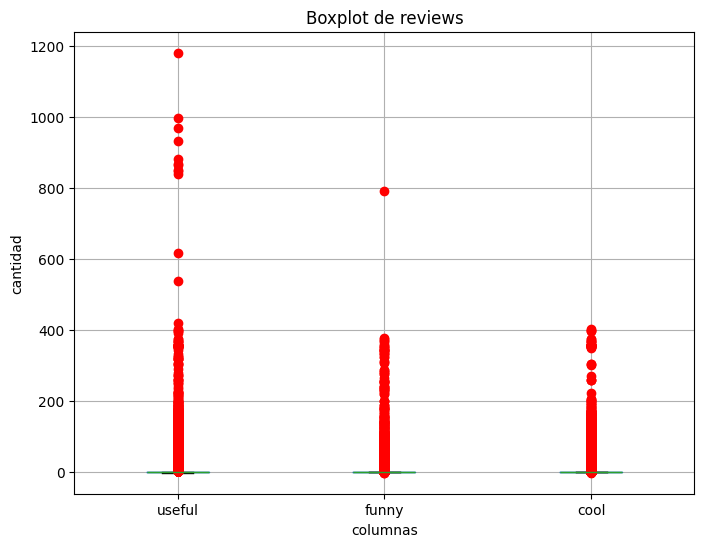

In [67]:
# visualizacion mediante boxplot
plt.figure(figsize=(8,6))
df_review.boxplot(column=['useful','funny','cool'], sym='ro')
plt.title('Boxplot de reviews')
plt.xlabel('columnas')
plt.ylabel('cantidad')

# Se muestra el grafico
plt.show()

>Existen muchas cantidad de outliers en la columna 'useful', 'funny' y 'cool' . 
La gran cantidad de valores bajos en el boxplot indica que la mayoría de los usuarios participa de manera moderada, publicando pocas reseñas y recibiendo pocos votos en las diferentes categorías.

Gráfico nube de palabras



In [68]:
# Tomar las primeras 1000 filas de la columna 'text'
df_review_subset = df_review.head(10000)

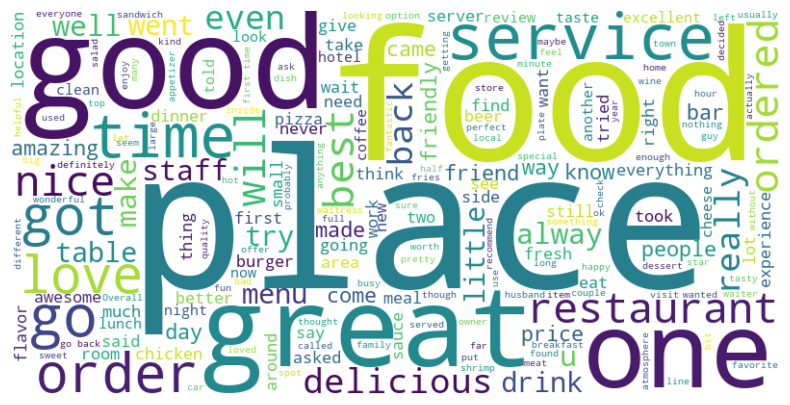

In [69]:
# unir la columna text
text = " ".join(review for review in df_review_subset.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> Las reseñas de Yelp tienden a centrarse en la calidad de la comida y del servicio. Se puede deducir que predomina el rubro gastrnómico al existir un gran predominio de la palabra 'food'. No se contempla a 'place', ya que es es una palabra generica que no necesariamente nos brinda mayor información.

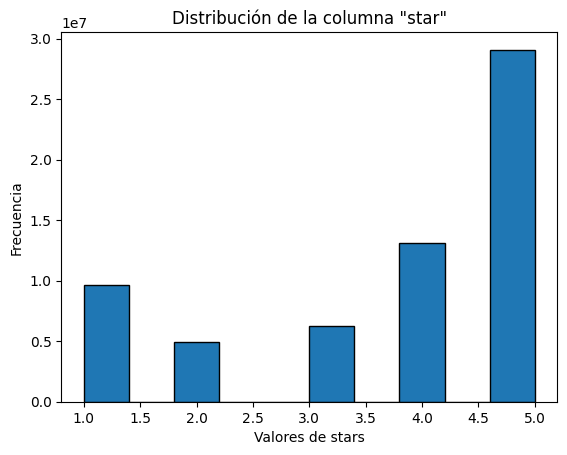

In [70]:
# Analisis grafico distribucion
valores = []

for valor in df_review_subset:
    
    valores_uso = df_review['stars']
    
    valores.extend(valores_uso)


plt.hist(valores, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()


>Se ve una tendencia de mayor frecuencia de puntuaciones de valor 5 en las reseñas.
La mayoría de las experiencias de los usuarios son positivas. Vemos que los usuarios tienden a calificar favorablemente los negocios.

Análisis de la columna 'Useful' con relacion al puntaje de dicha reseña

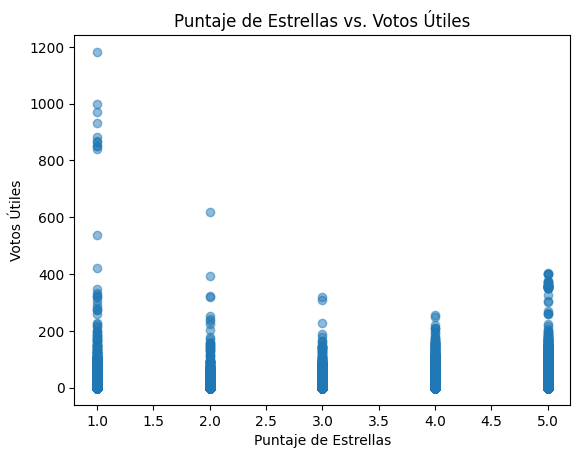

In [71]:
# Inicializamos listas para almacenar los datos 
useful_list = df_review['useful'].tolist()
stars_list = df_review['stars'].tolist()


# Creamos un gráfico de dispersión con los puntajes de estrellas en el eje X y los votos útiles en el eje Y
plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')  
plt.ylabel('Votos Útiles')          
plt.title('Puntaje de Estrellas vs. Votos Útiles')  
plt.show() 

Valoración de Reseñas

>Tendencia Negativa: Las reseñas positivas con altas calificaciones de estrellas tienden a recibir menoss votos útiles, lo que muestra una tendencia hacia la valoración de experiencias negativas.


In [72]:
# Ajusto seleccion de datos
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df_review.describe()

,stars,useful,funny,cool
count,6990280.00,6990280.00,6990280.00,6990280.00
mean,3.75,1.18,0.33,0.50
std,1.48,3.25,1.69,2.17
min,1.00,-1.00,-1.00,-1.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,1182.00,792.00,404.00


>Se corrobora que existe un review con 1182 calificaciones de useful, pero se puede tambien observar que el minimo es de -1, lo cual resulta absurdo. Por lo que se opta por corregir ese error.

In [73]:
# Cambiar valores negativos a positivos
df_review['useful'] = df_review['useful'].abs()
df_review['funny'] = df_review['funny'].abs()
df_review['cool']= df_review['cool'].abs()

In [74]:
# Descripcion de columnas numericas
df_review.describe()

,stars,useful,funny,cool
count,6990280.00,6990280.00,6990280.00,6990280.00
mean,3.75,1.18,0.33,0.50
std,1.48,3.25,1.69,2.17
min,1.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,1182.00,792.00,404.00


>Se corrobora que el error ya esta corregido

# Datasets TIP


Descripción: Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.

In [75]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open('../../data/Yelp/tip.json') as reader:
    for obj in reader:
        data.append(obj)

# Convertir la lista de objetos JSON en un DataFrame
df_tips = pd.DataFrame(data)
df_tips

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


>Se revisan algunas columas, tipos de datos y nulos

In [76]:
# Informacion de columnas
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [77]:
# Suma de valores nulos
df_tips.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

Se observa que no hay presencia de valos nulos, 

In [78]:
# Conteo de valores de la columna compliment_count
df_tips['compliment_count'].value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

En esta columna refiere a la cantidad de valoraciones que tuvo la sugerencia dejado por el usuario, vemos en su gran mayoria corresponde a 0. Por lo que se entiende que existe muy poca interaccion.

### Gráficos

Comencemos a analizar con una nube de palabras sobre una muestra de 10000 filas cuales se repiten más

In [79]:
# Muestra para el análisis
muestra_tip = df_tips.head(10000)

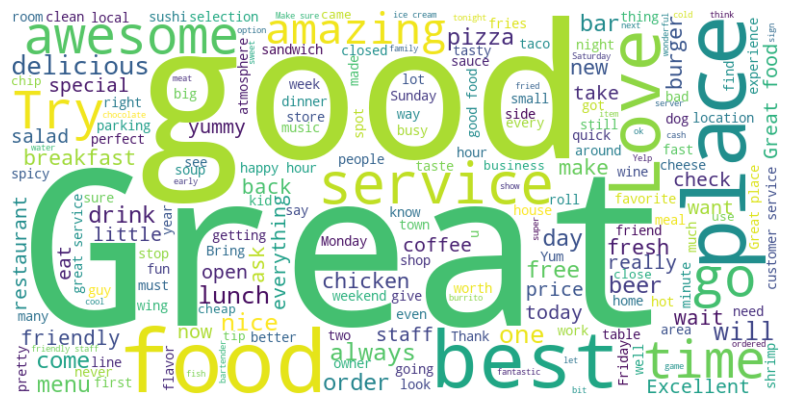

In [80]:
# Se combinan todos los textos de la columna 
text = " ".join(review for review in muestra_tip.text)
# Se crea una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

>Se puede observar que parece existir una tendencia a dejar comentarios buenos y favorables, dado que resaltan palabras como 'great', 'best' ,'good'.

Se prueba con un filtro, por ejemplo donde aparezca la palabra 'food' para conocer las palabras o frases asociadas que más se repiten.

In [81]:
# Se filtra por asocion a food
filtro = df_tips[df_tips['text'].str.contains('food', case=False)]

muestra2_tip = filtro.head(10000)

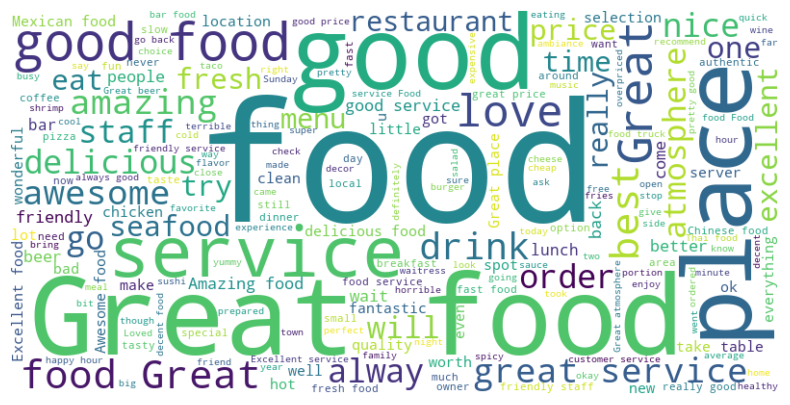

In [82]:
# Visualizacion por grafico nube de palabras
text2 = " ".join(review for review in muestra2_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de Comentarios en el Ámbito Gastronómico:

>Al aplicar un filtro sobre la muestra de datos analizados, se observa una prevalencia de términos y frases favorables relacionados con el ámbito gastronómico. Palabras y expresiones como "great food", "good", y "great service" son recurrentes en los comentarios, indicando una tendencia predominante hacia evaluaciones positivas. Esto sugiere que, en el dataset analizado (TIPS), los comentarios favorables superan en cantidad a las quejas.

# Dataset check in

Descripción: Registros ecorrespondientes a cada negocio.


In [83]:
# Creacion de dataframe
data = [] 

# Leer el archivo JSON Lines
with jsonlines.open('../../data/Yelp/checkin.json') as reader:
    for obj in reader:
        data.append(obj)

df_check = pd.DataFrame(data)
df_check

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


Se revisan columnas, tipos de datos, nulos 

In [84]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


>No hay presencia de nulos

>Además podemos ver de este dataset que contiene la informacion referida a cada negocio asociado por su id, y fechas de registros o cambios que se generen dentro de la plataforma, lo cual nos brinda informacion de los registros de cada negocio y en que fecha se realizo.

# Dataset business

Descripción: Contiene información del comercio, incluyendo localización, atributos y categorías.



In [85]:
# Creacion del dataframe
df_business = pd.read_pickle('../../data/Yelp/business.pkl')
# dataframe bussines
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.43,-119.71,5.00,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.55,-90.34,3.00,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.22,-110.88,3.50,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.96,-75.16,4.00,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.34,-75.47,4.50,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se busca informacion sobre las columnas, variables y valores nulos

In [86]:
# Descripcion de columnas
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [87]:
# Reviso valores nulos
df_business.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

>Se observa que hay columnas repetidas, las cuales tienen demasiados nulos, dado que hablamos de gran porcentaje opto por borrarlas ya que no podran brindar informacion útil


In [88]:
# Borro columnas repetidas 
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.43,-119.71,5.00,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.55,-90.34,3.00,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.22,-110.88,3.50,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.96,-75.16,4.00,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.34,-75.47,4.50,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Busco valores duplicados revisando id

In [89]:
duplicates = df_business.duplicated(subset=['business_id'], keep=False)
duplicate_ids = df_business[duplicates]['business_id'].unique()
duplicate_ids


array([], dtype=object)

>No se encuentran valores duplicados

In [90]:
# Mostrar valores nulos en el dataframe modificado
df_business.isna().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

>Se pueden observar la presencia de valores faltantes en el dataset presentes en las columnas: state, categories, y en gran medida en attributes y hours 

Análisis sobre las columnas de interés

In [91]:
# Valores unicos de categories
df_business['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                          1012
Restaurants, Pizza                                                                                                   935
Nail Salons, Beauty & Spas                                                                                           934
Pizza, Restaurants                                                                                                   823
Restaurants, Mexican                                                                                                 728
                                                                                                                    ... 
Restaurants, Specialty Food, Food, Sandwiches, Italian                                                                 1
Professional Services, Accountants, Financial Services, Tax Services                                                   1
Caterers, Convenience

>Se observa que las categorias más frecuentes son Salones de Belleza y negocios del rubroo gastronomico, pero en deversas categorias.

Se analiza por estados, los valores que existen y en cuales hay mayores frecuencias

In [92]:
# Ver la cantidad de valores unicos en state
unique_states = df_business['state'].nunique()
unique_states

27

>Se visualiza que solo tiene la presencia de 27 estados.

Se quiere ver cuales y en que frecuencia

In [93]:
# Contar las veces que esta presente cada estado
df_business['state'].value_counts()

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
HI         2
MA         2
WA         2
UT         1
NC         1
MI         1
MT         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

>Se visualiza que los mayores negocios estan presentes en los siguientes estados segun acronimo:
- **PA** - Pennsylvania
- **FL** - Florida
- **TN** - Tennessee
- **IN** - Indiana
- **MO** - Missouri
- **LA** - Louisiana
- **AZ** - Arizona
- **NJ** - New Jersey
- **NV** - Nevada
- **AB** - Alberta (provincia en Canadá)
- **CA** - California
- **ID** - Idaho
- **DE** - Delaware
- **IL** - Illinois

In [94]:
# Valores únicos en la columna 'postal_code'
df_business['postal_code'].value_counts()


postal_code
93101      1866
89502      1804
70130      1512
19103      1362
19107      1353
           ... 
37077         1
28217         1
T5P 4J5       1
T6V 1J1       1
T6N 0A4       1
Name: count, Length: 3362, dtype: int64

> **Observación** El código postal "T5P" corresponde a la ciudad de Edmonton en la provincia de Alberta, Canadá. Lo mismo con T6V 1J1 y T6N 0A4.

Estos datos se quitaran del dataframe, ya que no se corresponden a la región de analisis en USA. Se buscan registros que puedan tener esta caracteristica.

In [95]:
df_business[df_business['postal_code'].astype(str).str.startswith('T')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,LA,T5J 1B9,53.55,-113.50,4.00,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
46,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,PA,T5J 1L7,53.54,-113.51,4.00,12,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Arts & Entertainment, Music Venues, Internet S...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
52,5BmQX4UVJY19mMtafMg7JA,Breadland Organic Whole Grain Bakery,"11642 104 Avenue, Unit 642",Edmonton,PA,T5K 2T7,53.55,-113.52,4.00,23,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Specialty Food, Bakeries, Food, Health Markets","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.55,-113.51,5.00,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
77,mFTaYsRDyeFaY2NDLfSaAA,River City Games,5203 99 Street NW,Edmonton,FL,T6E 5B7,53.49,-113.49,4.50,5,1,"{'BusinessParking': '{'garage': False, 'street...","Tabletop Games, Shopping, Sporting Goods","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150263,VRSQk67FPiDQolDyiaFnjg,Citytv,10212 Jasper Ave NW,Edmonton,PA,T5J 5A3,53.54,-113.50,4.00,8,1,None,"Television Stations, Mass Media",None
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,PA,T6J 7C2,53.46,-113.49,3.00,35,1,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Japanese, Restaurants, Steakhouses, Sushi Bars","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
150332,t_SGoRT5yt14OWr64TOulA,Sherwood Park Kwik Lube,979 Fir St,Sherwood Park,PA,T8A 4N5,53.51,-113.33,5.00,5,1,None,"Oil Change Stations, Automotive, Auto Repair",None
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,NJ,T5T 1K8,53.51,-113.68,4.50,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


>Se observa que existen muchos datos correspondientes a Canadá, por lo que se opta por eliminar estos registros. Sabiendo que los datos de codigos postales son numéricos se tiene la estrategia de pasar la columna a int y eliminar lo que no puedan ser datos numéricos. 

In [96]:
# Transformacion a dato numerico con los fallos en nulos
df_business['postal_code'] = pd.to_numeric(df_business['postal_code'], errors='coerce').astype('Int64')
# Contar nulos
df_business['postal_code'].isna().sum()

np.int64(5629)

In [97]:
# Elimino valores nulos
df_business = df_business.dropna(subset=['postal_code'])

In [98]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144717 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   144717 non-null  object
 1   name          144717 non-null  object
 2   address       144717 non-null  object
 3   city          144717 non-null  object
 4   state         144714 non-null  object
 5   postal_code   144717 non-null  Int64 
 6   latitude      144717 non-null  object
 7   longitude     144717 non-null  object
 8   stars         144717 non-null  object
 9   review_count  144717 non-null  object
 10  is_open       144717 non-null  object
 11  attributes    131588 non-null  object
 12  categories    144615 non-null  object
 13  hours         122558 non-null  object
dtypes: Int64(1), object(13)
memory usage: 16.7+ MB


## Análisis de manera Gráfica
Se requiere ver en un gráfico de distribucion los estados con mayor concertracion de negocios

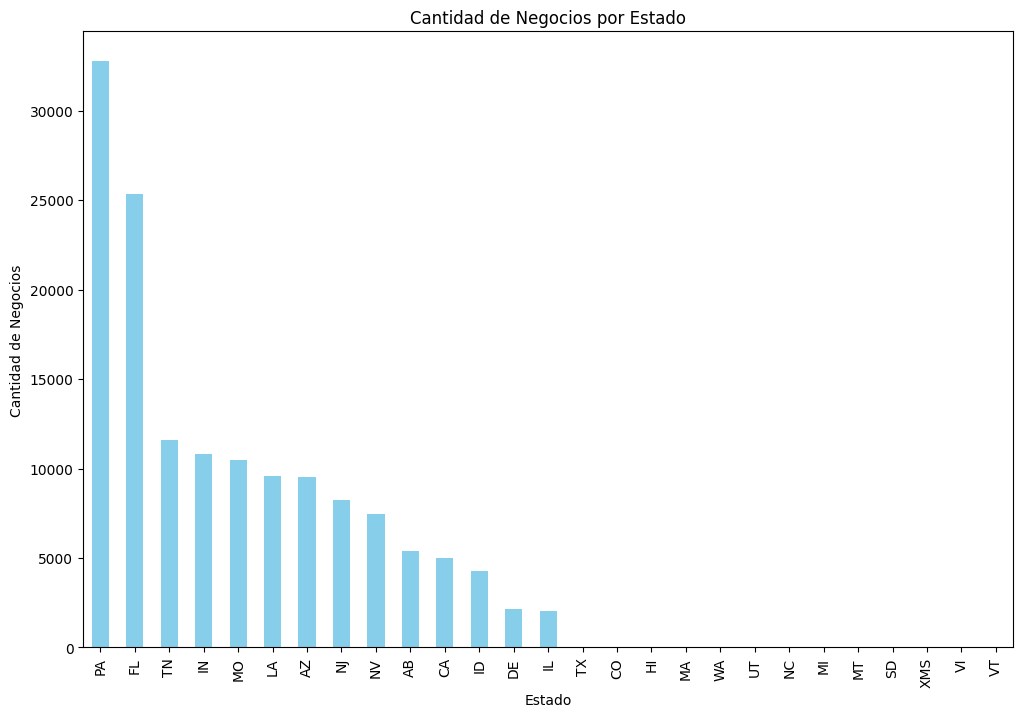

In [99]:
# Agrupamos los datos por estado y contamos la cantidad de negocios en cada estado
state_counts = df_business['state'].value_counts()
# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Negocios')
plt.title('Cantidad de Negocios por Estado')
plt.xticks(rotation=90)  
plt.show()

>Se observa que en los estados de mayor concentracion de negocios existe muchisima presencia en Pensilvania y Florida, seguido por Tennessee, Indiana, Missouri.

>En relación con los demas estados, queda bastante claro que la concentración de negocios registrados en la plataforma de Yelpes menor, siendo una diferencia bastante notoria. Esto tambien podria deberse a la popularidad de dicha aplicacion en estas regiones.

Análisis por calificacion de estrellas

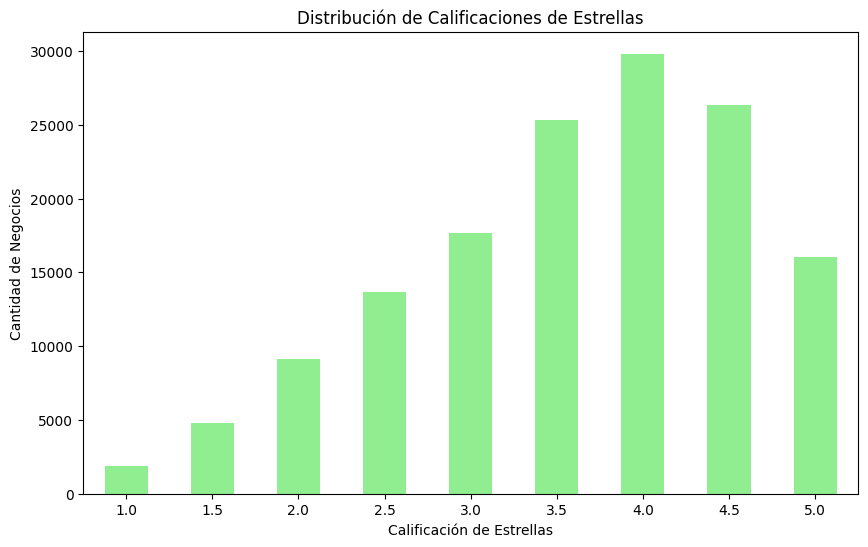

In [100]:
# Agrupar los datos por estrellas y contamos la cantidad de ocurrencias de cada calificación
stars_counts = df_business['stars'].value_counts().sort_index()

# Creacion el gráfico de barras
plt.figure(figsize=(10, 6))
stars_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Calificación de Estrellas')
plt.ylabel('Cantidad de Negocios')
plt.title('Distribución de Calificaciones de Estrellas')
plt.xticks(rotation=0)  
plt.show()

>Las calificaciones de 1.0 y 1.5 estrellas son las menos frecuentes, con menos de 10,000 negocios cada una.
A medida que aumentan las calificaciones a 2.0 y 2.5 estrellas, la cantidad de negocios incrementa, alcanzando cerca de 15,000 para la calificación de 2.5 estrellas.

>Las calificaciones de 3.0 y 3.5 estrellas muestran un incremento significativo en la cantidad de negocios.

>Las calificaciones de 4.0 y 4.5 estrellas también son bastante comunes, con alrededor de 25,000 negocios cada una.
La cantidad de negocios con una calificación de 5.0 estrellas disminuye a alrededor de 15,000, lo que indica que obtener la calificación perfecta es menos frecuente que las calificaciones ligeramente inferiores.

C:\Users\ezequ\AppData\Local\Temp\ipykernel_17668\3663238760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette="muted")


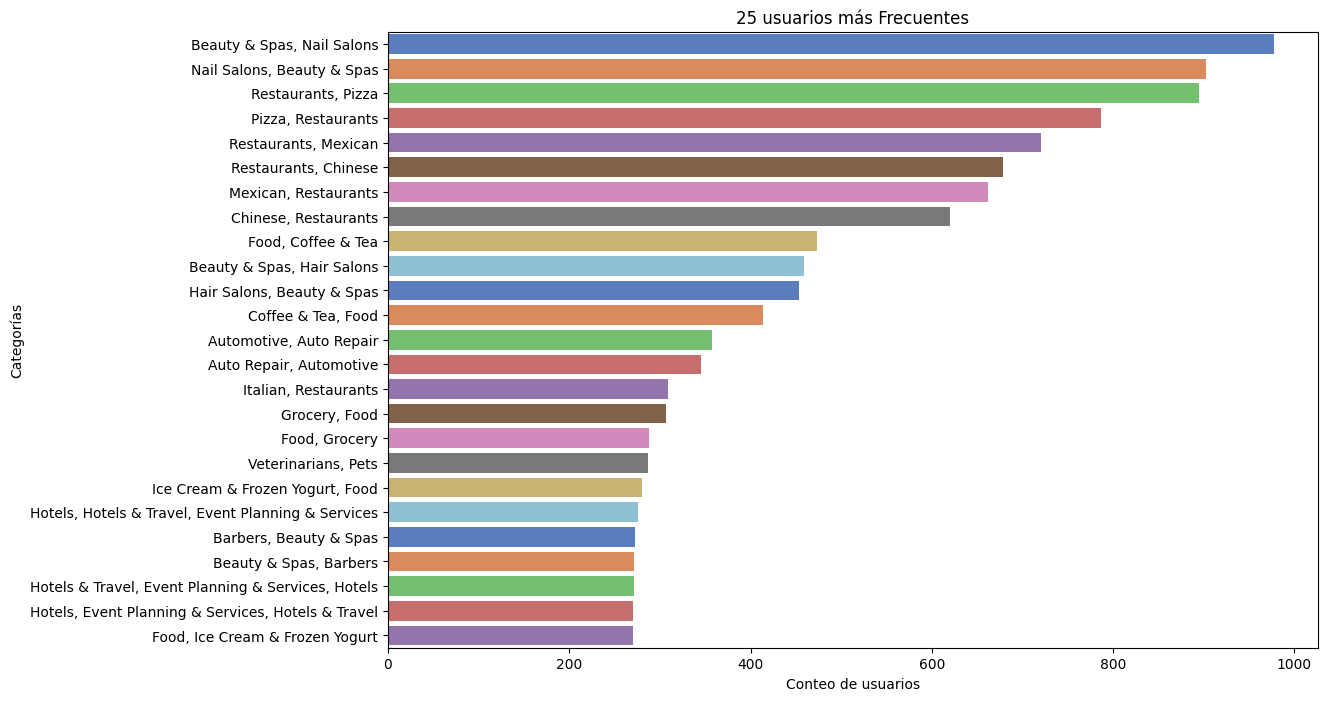

In [101]:
# Se filtra la categoria de cada uno
categoria_counts =df_business['categories'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 caaategorías más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette="muted")
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

Sectores Populares

>Gastronomía y Servicios de Belleza: La gastronomía y los servicios de belleza son los sectores más reseñados y mencionados en Yelp, lo que sugiere que son de gran interés para los usuarios.
Cadenas de Comida Rápida y Servicios Rápidos: Dominan a nivel nacional 

In [102]:
# Se cuentan los  negocios que tienen mas apariciones
mayores_negocios = df_business.name.value_counts()
mayores_negocios.head(20)

name
Starbucks                677
McDonald's               665
Dunkin'                  510
Subway                   444
Taco Bell                362
CVS Pharmacy             345
Walgreens                341
Burger King              332
Wendy's                  319
Wawa                     307
Domino's Pizza           291
The UPS Store            278
Pizza Hut                262
Enterprise Rent-A-Car    225
Papa John's Pizza        191
Great Clips              185
Jimmy John's             175
US Post Office           174
KFC                      162
Chick-fil-A              162
Name: count, dtype: int64

Podemos observar que la matoria de cadenas que se repiten son del ámbito gastronómico, vamos a verlo de manera gráfica.

C:\Users\ezequ\AppData\Local\Temp\ipykernel_17668\1233441172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_categorias.values, y=top_30_categorias.index, palette="pastel")


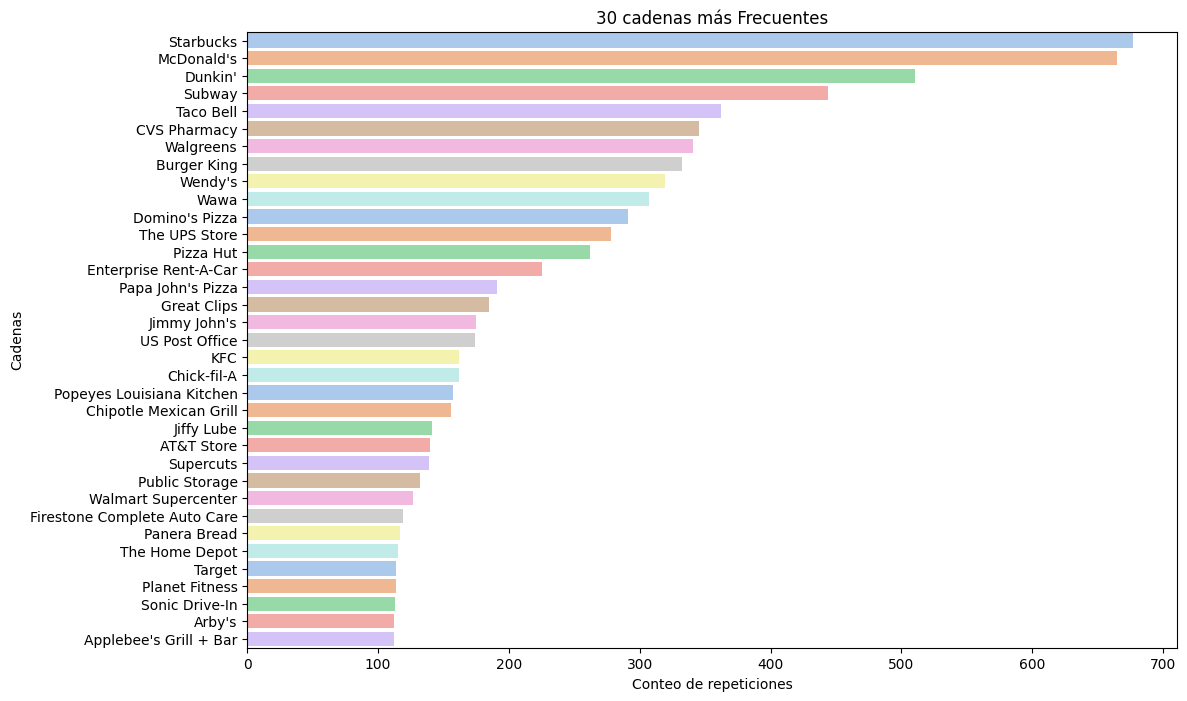

In [103]:
business_count = df_business['name'].value_counts()
top_30_categorias = business_count.head(35)

import seaborn as sns 

plt.figure(figsize=(12, 8))
sns.barplot(x=top_30_categorias.values, y=top_30_categorias.index, palette="pastel")
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Cadenas')
plt.title('30 cadenas más Frecuentes')
plt.show()

>Podemos notar que en su mayoria existen muchisimos negocios usuarios de Yelp que se corresponden al rubro gastronomico, viendo aqui los mejores por filtrado de la columna 'name', que corresponden a las mas grandes cadenas existentes en USA.
Se observa que las cadenas de comida rápida y servicios rápidos son las más mencionadas, lo que sugiere una alta frecuencia de uso y, posiblemente, una mayor interacción de los usuarios con estas marcas.

Filtremos esto para ver quienes tienen mayor frecuencia en un Estado puntual, California.

In [104]:
df_business_california = df_business.loc[df_business['state'] == 'CA']
df_business_california.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.96,-75.16,4.00,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.46,-86.66,3.50,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,8102,39.95,-75.12,4.50,6,1,"{'BusinessParking': '{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
94,ZM46RDLXaFNo_z6t-j_L4w,Absolutely Perfect Inc,1153 Byberry Rd,Bensalem,CA,19020,40.11,-74.91,3.50,5,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Masonry/Concrete, Gardeners, Lawn Services, Tr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
123,iPSPcprSnkLOuL1Ns8UZZA,Pete's Barber Shop,1209 N 29th St,Philadelphia,CA,19121,39.97,-75.18,4.50,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Barbers, Beauty & Spas",None


C:\Users\ezequ\AppData\Local\Temp\ipykernel_17668\3553184612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="pastel")


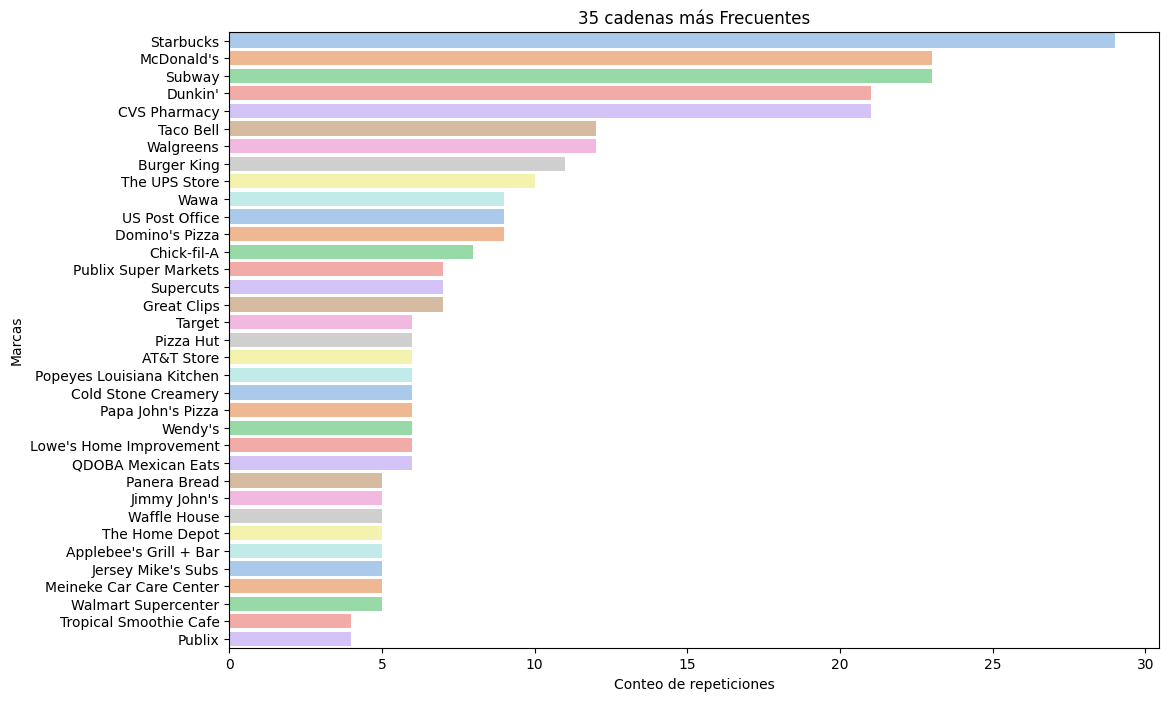

In [105]:
business_count_ca = df_business_california['name'].value_counts()
top_categorias = business_count_ca.head(35)

import seaborn as sns 

plt.figure(figsize=(12, 8))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="pastel")
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Marcas')
plt.title('35 cadenas más Frecuentes')
plt.show()

Distribución de Negocios

>El estado de California tiene una alta concentración de negocios registrados en Yelp, con una notable preponderancia de cadenas de comida rápida y servicios rápidos como Starbucks, McDonald's y Subway.
Los gráficos mostraron que Starbucks es la cadena con mayor presencia en el estado, seguida por McDonald's y Subway, lo que destaca la importancia del sector gastronómico en la plataforma.

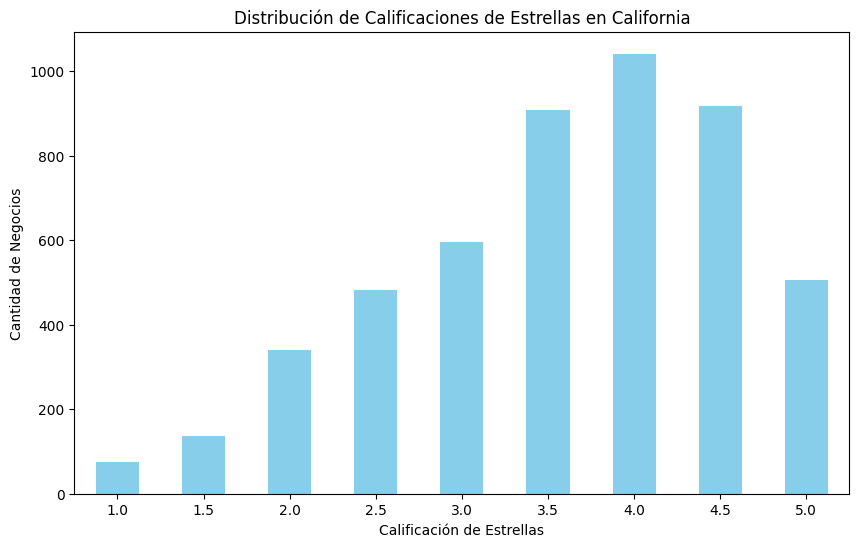

In [106]:
# Agrupar los datos por estrellas y contamos la cantidad de ocurrencias de cada calificación
stars_counts = df_business_california['stars'].value_counts().sort_index()

# Creacion el gráfico de barras
plt.figure(figsize=(10, 6))
stars_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Calificación de Estrellas')
plt.ylabel('Cantidad de Negocios')
plt.title('Distribución de Calificaciones de Estrellas en California')
plt.xticks(rotation=0)  
plt.show()

>La mayoría de los negocios en California reciben calificaciones moderadas a altas (entre 3.0 y 4.5 estrellas).
>Las calificaciones más frecuentes son de 3.5 estrellas, seguidas de cerca por 4.0 estrellas. Las calificaciones perfectas de 5.0 estrellas son menos comunes, lo que sugiere que alcanzar una calificación perfecta es un desafío.
>La distribución sugiere una tendencia positiva en la satisfacción del cliente, con la mayoría de los negocios recibiendo reseñas relativamente favorables.

Se requiere por lo tanto filtrar negocios con estrellas entre 3 y 5 estrellas  en todo el dataframe y luego comparar estas con los datos de California

In [107]:
# Filtrado entre 3 y 5 stars para tener los nombres de negocios con mejores reseñas
filtered_business = df_business[(df_business['stars'] >= 3) & (df_business['stars'] <= 5)]


In [108]:
# Conteo de mayor repeticion y selecciono los primeros 35
name_count = filtered_business['name'].value_counts()
top_names = name_count.head(35)


Graficar los resultados

C:\Users\ezequ\AppData\Local\Temp\ipykernel_17668\561499571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.values, y=top_names.index, palette="Pastel2")


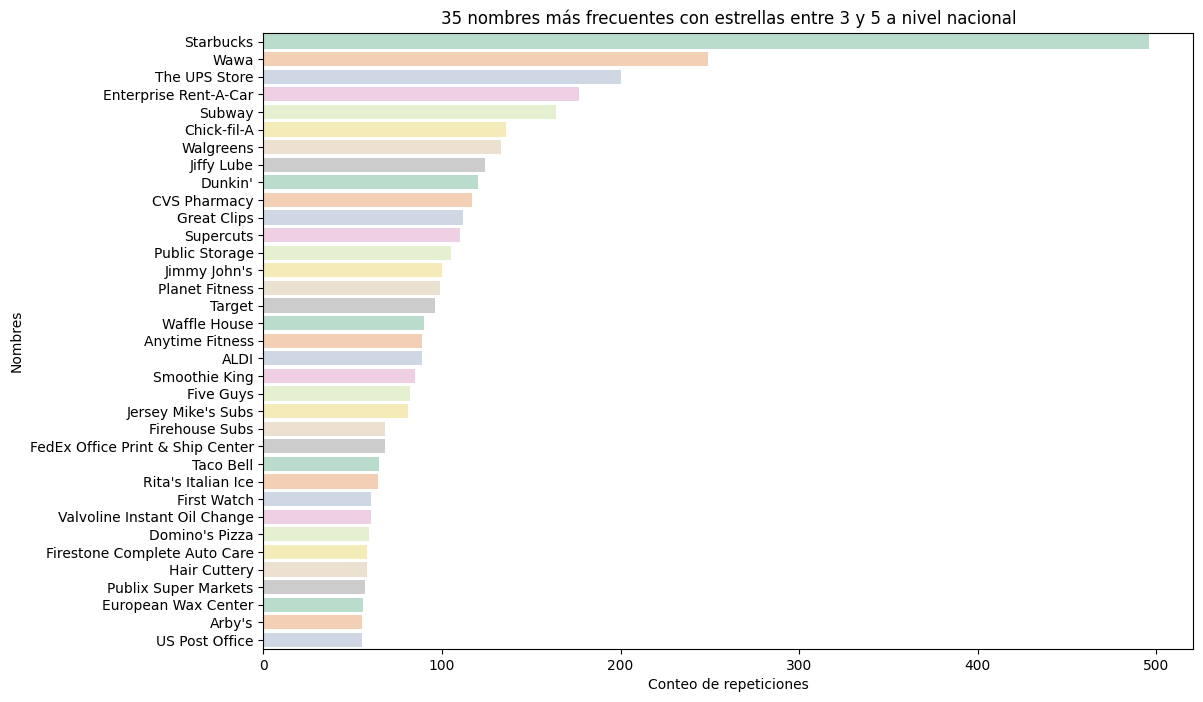

In [109]:
# Creo grafico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_names.values, y=top_names.index, palette="Pastel2")
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Nombres')
plt.title('35 nombres más frecuentes con estrellas entre 3 y 5 a nivel nacional')
plt.show()


>Los negocios representados en este gráfico son aquellos que han recibido una cantidad significativa de reseñas con calificaciones de entre 3 y 5 estrellas, lo que puede implicar una satisfacción moderada a alta por parte de los usuarios.
>La frecuencia de los nombres sugiere que estos negocios tienen una presencia notable en la base de datos de reseñas, posiblemente debido a su popularidad y amplia distribución y las cadenas mas frecuentes corresponden a categorias de gastronomia y comida rapida

Relacionando con el gráfico anterior, podemos seleccionar que cadenas presentes en este gráfico son las que tienen mejores reseñas. Tomo uno de ejemplo, Taco Bell

In [116]:
taco_bell_categories = df_business[df_business['name'] == 'Taco Bell'][['name', 'categories']]
print(taco_bell_categories)

             name                                         categories
1067    Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
1191    Taco Bell  Restaurants, Fast Food, Mexican, Tex-Mex, Taco...
2150    Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ve...
3007    Taco Bell    Restaurants, Fast Food, Tex-Mex, Tacos, Mexican
3321    Taco Bell  Restaurants, Fast Food, Breakfast & Brunch, Me...
...           ...                                                ...
149074  Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
149175  Taco Bell  Tex-Mex, Restaurants, Breakfast & Brunch, Fast...
149963  Taco Bell  Fast Food, Breakfast & Brunch, Restaurants, Ta...
150087  Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ta...
150166  Taco Bell  Restaurants, Tex-Mex, Fast Food, Mexican, Taco...

[362 rows x 2 columns]


In [118]:
df_business.iloc[1067]['categories']

'Chicken Wings, Nightlife, Bars, Delis, Food, Beer Gardens, Sandwiches, Beer Bar, Restaurants, Beer, Wine & Spirits, Gastropubs'

>Categorias de gastronomia comida rapida

In [117]:
# filtro 3 a 5 estrellas en el estado de california
filtered_business_ca = df_business_california[(df_business_california['stars'] >= 3) & (df_business['stars'] <= 5)]

C:\Users\ezequ\AppData\Local\Temp\ipykernel_17668\323050542.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names_ca.values, y=top_names_ca.index, palette="Paired")


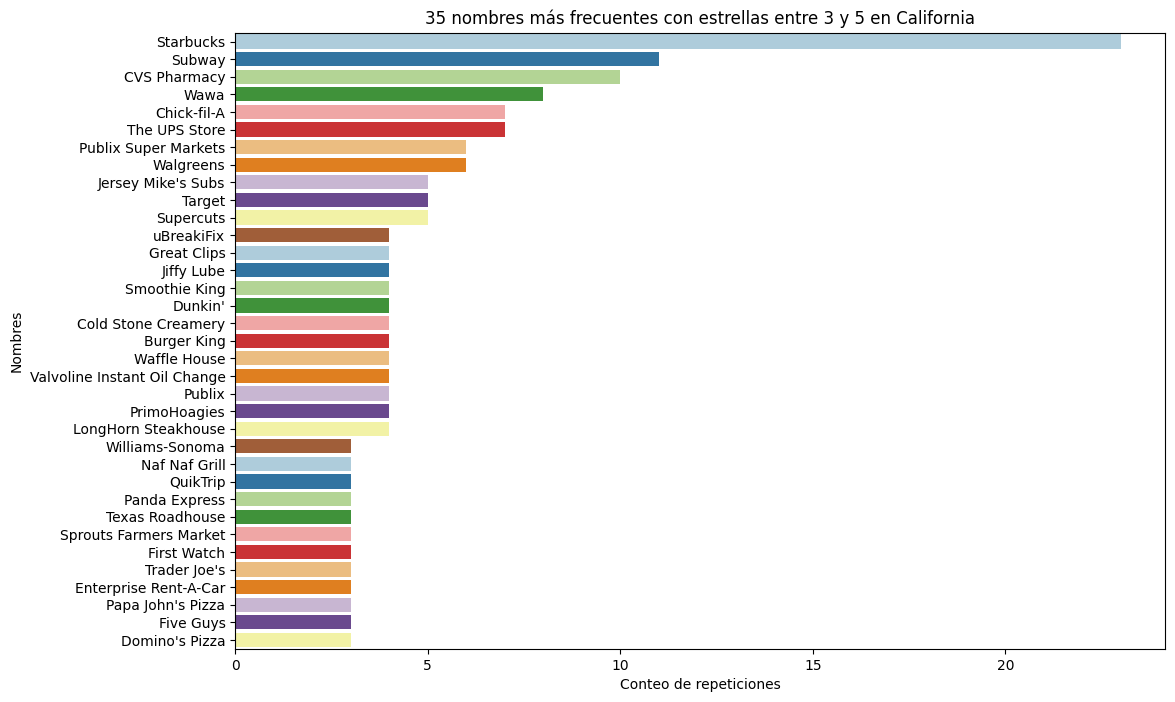

In [119]:
# Conteo de mayor repeticion y selecciono los primeros 35
name_count_ca = filtered_business_ca['name'].value_counts()
top_names_ca = name_count_ca.head(35)
# Creo grafico de barras
plt.figure(figsize=(12, 8))

import seaborn as sns

sns.barplot(x=top_names_ca.values, y=top_names_ca.index, palette="Paired")
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Nombres')
plt.title('35 nombres más frecuentes con estrellas entre 3 y 5 en California')
plt.show()


>Al igual que en analisis grafico anterior, aqui se puede observar aquellos negocios que han recibido una cantidad significativa de reseñas con calificaciones de entre 3 y 5 estrellas, entendiendo que se habla de una satisfacción moderada a alta por parte de los usuarios.

# Dataset user

Este dataset contiene datos del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario.


In [120]:
# Creacion del dataframe
df_user = pd.read_parquet('../../data/Yelp/user.parquet')
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [121]:
# Descripcion del dataframe
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


Reviso los valores nulos

In [122]:
# Sumar valores nulos
df_user.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

>Este dataset posee multiples columnas con informacion referente a los usuarios de Yelp, y diferentes promedios. No posee nulos o datos faltantes
>Se observan 5 columnas categóricas y 17 columnas numéricas

Revision de valores repetidos.

In [123]:
# Conteo de duplicados
df_user.duplicated().sum()

np.int64(117700)

>Existen 117700 filas repetidas, como esto no va a darme informacion fiable, decido eliminarlos para un mejor analisis

In [124]:
# Se borra registros duplicados
df_user.drop_duplicates(inplace=True)

Revision de valores atipicos en las columnas numéricas

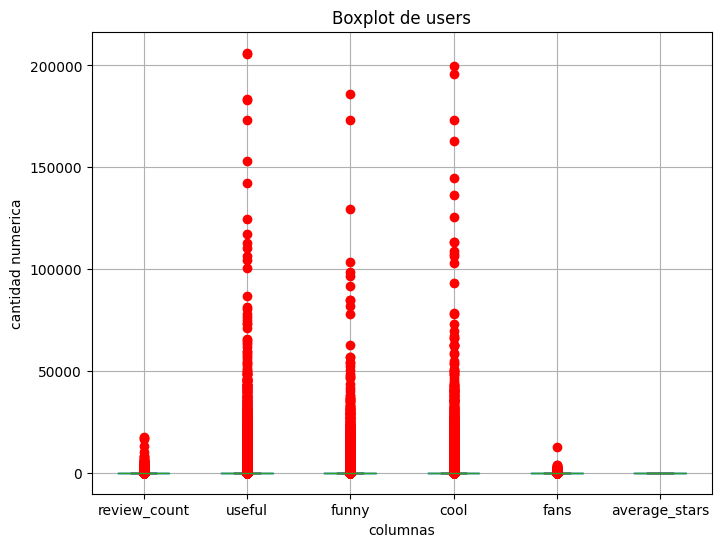

In [125]:
# Creacion del grafico boxplot
plt.figure(figsize=(8,6))
df_user.boxplot(column=['review_count','useful','funny','cool','fans','average_stars'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

>Podemos ver que existen muchos valores outliers en cuanto a las columnas'useful','funny','cool' . Algunas pocas con datos de reviews y no hay outliers en average_stars, lo cual se corresponde a lo que cuenta la columna.

>La mayoría de los usuarios tienen valores bajos en todas las métricas evaluadas, lo cual se refleja en la concentración de datos cerca del eje horizontal.
Hay presencia de numerosos valores atípicos (outliers) que se extienden hacia valores muy altos en todas las métricas, especialmente en las categorías de 'useful', 'funny' y 'cool'.

>Las métricas 'useful', 'funny' y 'cool' muestran una gran cantidad de valores atípicos indicando que algunos usuarios reciben una cantidad excepcionalmente alta de interacciones en sus reseñas.

>La alta concentración de valores bajos en el boxplot sugiere que la mayoría de los usuarios tienen una participación moderada, con pocas reseñas y votos en las distintas categorías.

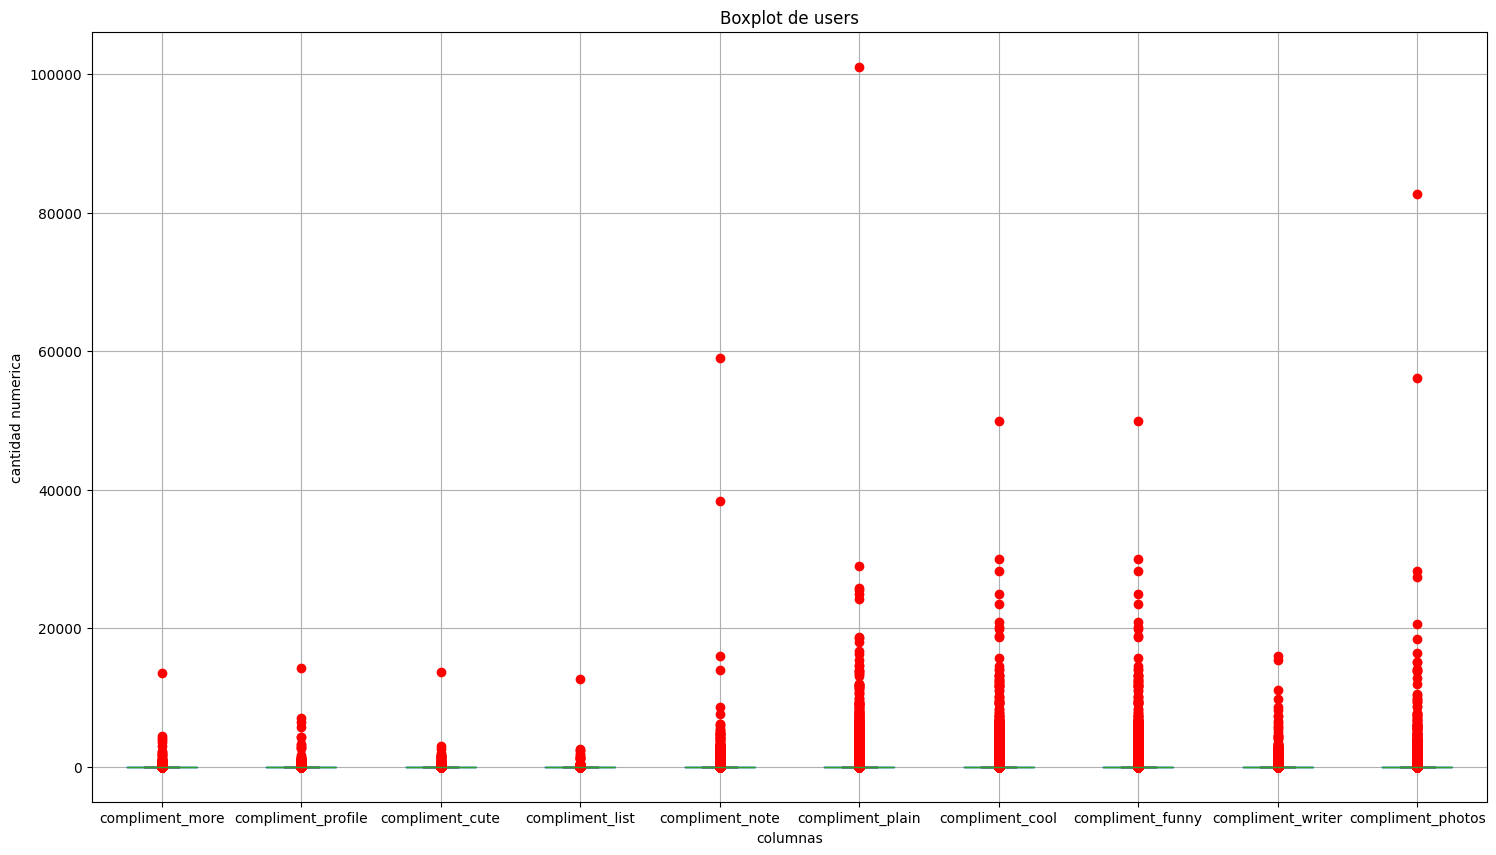

In [126]:
# grafico boxplot para el resto de columnas
plt.figure(figsize=(18,10))
df_user.boxplot(column=['compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

>El gráfico boxplot muestra la distribución de diferentes tipos de cumplidos recibidos por los usuarios.


>Existen varios valores atípicos (outliers) que se extienden hacia valores muy altos, particularmente en las categorías de 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', y 'compliment_photos'. Estos valores atípicos resaltan la existencia de usuarios altamente reconocidos o populares, quienes reciben una cantidad significativamente mayor de cumplidos en comparación con el promedio.

# Conclusiones Finales

El análisis de la plataforma Yelp revela lo siguiente:

**Sectores Populares**
- **Gastronomía y Servicios de Belleza**: Son los sectores más reseñados. Las cadenas de comida rápida, como las que dominan en California, presentan oportunidades de crecimiento debido a su alta demanda y buena puntuación.

**Participación de Usuarios**
- **Usuarios Activos**: La mayoría de los usuarios no generan muchos votos validados como 'útiles', aunque algunos son muy activos, indicando una participación moderada de la comunidad.

**Valoración de Reseñas**
- **Tendencia Negativa**: Las reseñas con calificaciones altas tienden a recibir menos votos útiles, lo que muestra una tendencia hacia la valoración de experiencias negativas.

**Oportunidades de Crecimiento**
- **Margen de Mejora**: Hay margen para que los negocios mejoren y alcancen calificaciones perfectas, ya que muchas reseñas tienen calificaciones moderadas a altas.

**Enfoques para Negocios**

- **Calidad**: Mantener altos estándares de calidad en productos y servicios es crucial para recibir reseñas positivas y atraer más clientes.

- **Interacción con Usuarios**: Fomentar la interacción y responder a las reseñas ayuda a mejorar la reputación y la visibilidad.

- **Estrategias de Crecimiento**: Identificar oportunidades de expansión en áreas de alta demanda, como el sector de comida rápida en California.

**Situación en California**

- **Distribución de Negocios**: California tiene una alta concentración de cadenas de comida rápida y servicios rápidos como Starbucks, McDonald's y Subway.

- **Calificaciones**: La mayoría de los negocios en California reciben calificaciones moderadas a altas. Las calificaciones perfectas son menos comunes, indicando un desafío para alcanzarlas.

- **Interacción de Usuarios**: Las reseñas con calificaciones moderadas a altas reciben menos votos útiles, mientras que las calificaciones más bajas reciben más interacción, sugiriendo que estas son vistas como más informativas.

**Implicaciones para Negocios**

- **Visibilidad y Competencia**: La competencia es fuerte, especialmente en el sector de comida rápida. Los negocios nuevos deben enfocarse en obtener y mantener altas calificaciones para destacar.

- **Estrategias de Marketing**: Priorizar la satisfacción del cliente y usar reseñas favorables como herramienta de marketing para atraer más clientes.
